In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df = df[['Age','Fare','Survived']]
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [14]:
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [15]:
df = df.fillna(df['Age'].mean(),axis=1)

In [62]:
def solve(trans_age,trans_fare,individual):
    x = df[['Age','Fare']]
    y = df['Survived']
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.compose import ColumnTransformer
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import cross_val_score
    import scipy.stats as stats
    
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
    
    if individual:
        plt.figure(figsize=(12,5))
        plt.subplot(121)
        sns.histplot(x_train['Age'],kde=True)
        plt.subplot(122)
        stats.probplot(x_train['Age'],dist='norm',plot=plt)
        plt.show()
        
        plt.figure(figsize=(12,5))
        plt.subplot(121)
        sns.histplot(x_train['Fare'],kde=True)
        plt.subplot(122)
        stats.probplot(x_train['Fare'],dist='norm',plot=plt)
        plt.show()
    trf = ColumnTransformer((
        ('trf_age',FunctionTransformer(trans_age),['Age']),
        ('trf_fare',FunctionTransformer(trans_fare),['Fare'])
    ),remainder='passthrough')
    
    x_train_transformed = pd.DataFrame(trf.fit_transform(x_train),columns=['Age','Fare'])
    x_test_transformed = pd.DataFrame(trf.transform(x_test),columns=['Age','Fare'])
    
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    stats.probplot(x_train['Age'],plot=plt)
    plt.subplot(122)
    stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
    plt.show()
    
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    stats.probplot(x_train['Fare'],dist='norm',plot=plt)
    plt.subplot(122)
    stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
    plt.show()
    
    lr = LogisticRegression()
    clf = DecisionTreeClassifier()
    
    lr.fit(x_train_transformed,y_train)
    clf.fit(x_train_transformed,y_train)
    
    y_pred_lr = lr.predict(x_test_transformed)
    y_pred_clf = clf.predict(x_test_transformed)
    
    print('Logistic Regression Accuracy Score : ',accuracy_score(y_test,y_pred_lr))
    print('Decision Tree Accuracy Score : ',accuracy_score(y_test,y_pred_clf))
    
    
    print('Logistic Regression  cross_val_score : ',cross_val_score(lr,x_test_transformed,y_test,cv=7,scoring='accuracy').mean())
    print('Decision Tree cross_val_score : ',cross_val_score(clf,x_test_transformed,y_test,cv=7,scoring='accuracy').mean())
    
    
    
    
    
    
    

/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


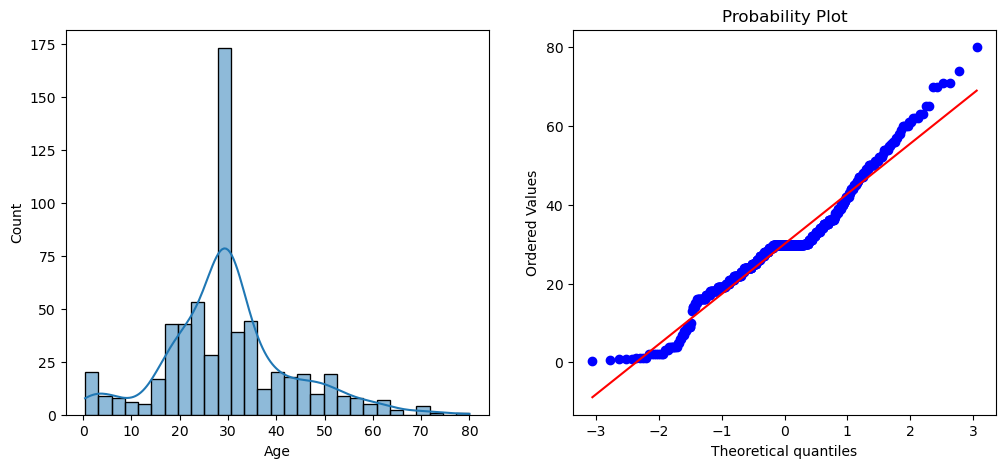

/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


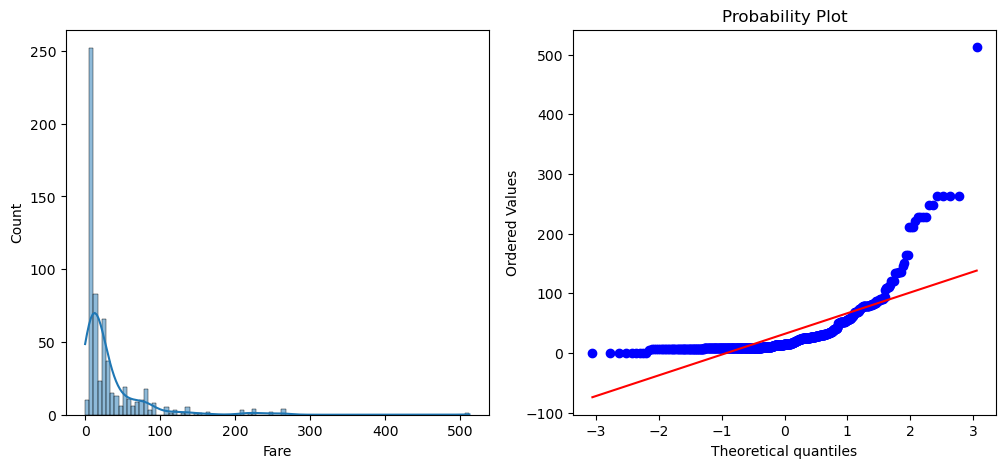

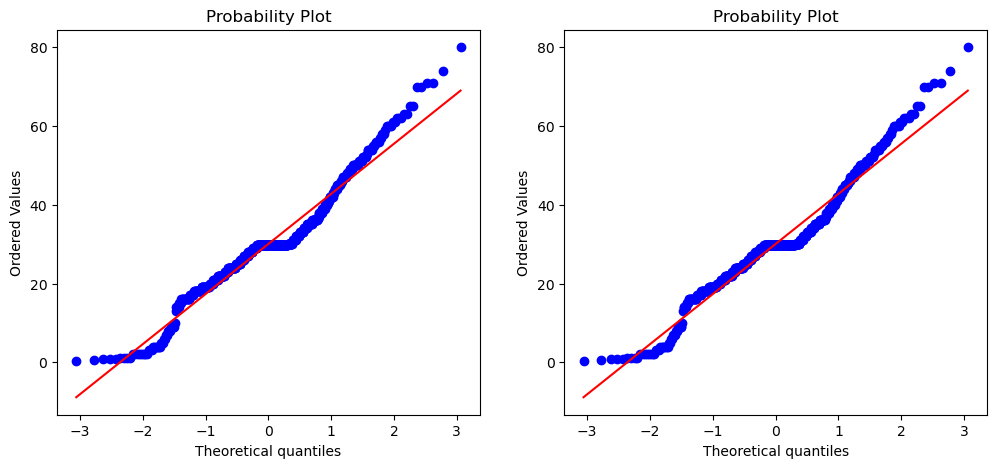

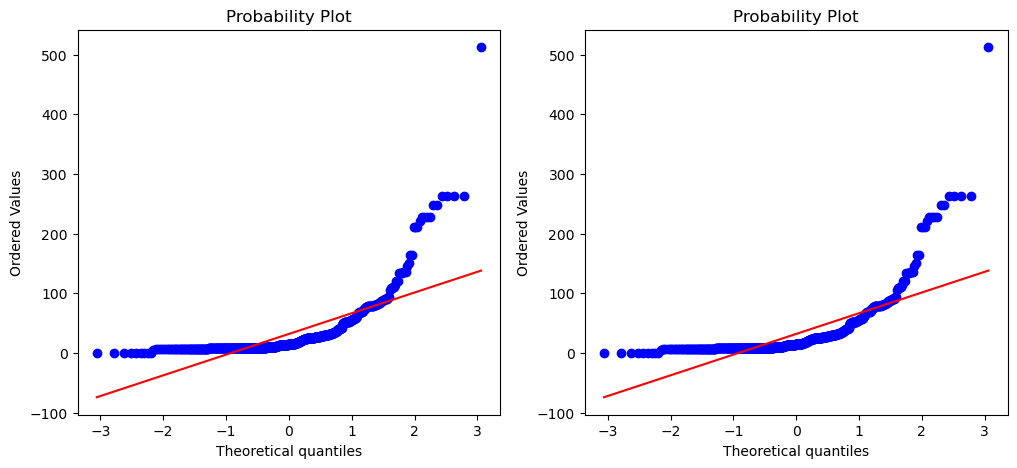

Logistic Regression Accuracy Score :  0.667910447761194
Decision Tree Accuracy Score :  0.6977611940298507
Logistic Regression  cross_val_score :  0.6604973973395026
Decision Tree cross_val_score :  0.6158665895508001


In [63]:
solve(lambda x:x,lambda x:x,True)

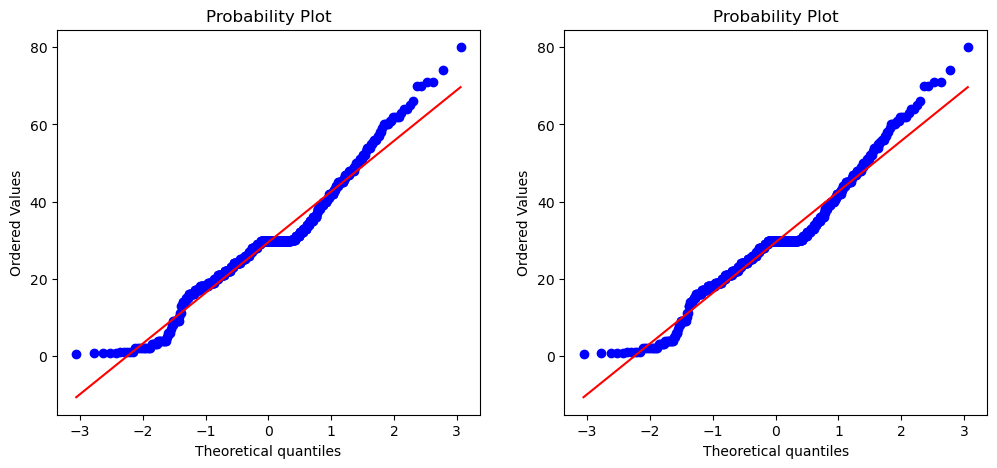

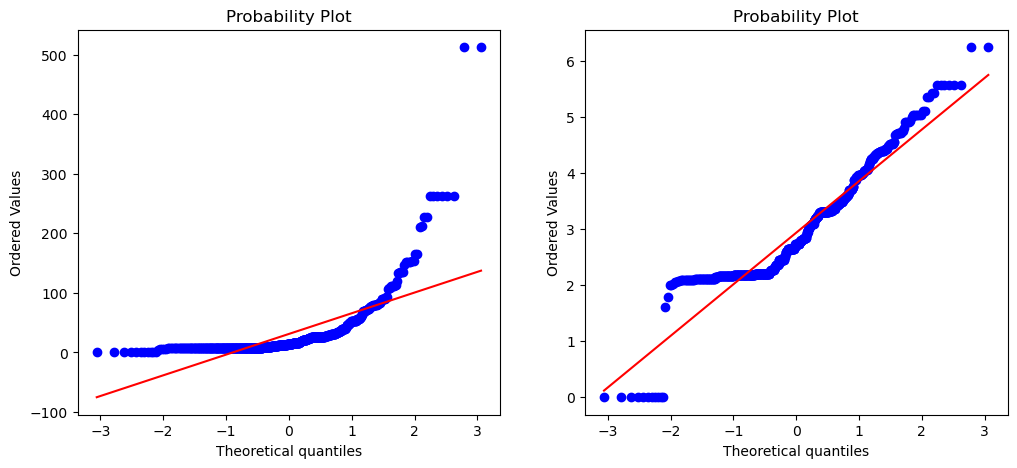

Logistic Regression Accuracy Score :  0.7089552238805971
Decision Tree Accuracy Score :  0.6567164179104478
Logistic Regression  cross_val_score :  0.6980913823019085
Decision Tree cross_val_score :  0.6493155966840176


In [66]:
solve(trans_age=lambda x:x , trans_fare=lambda x : np.log1p(x),individual=False)